In [3]:
### **Fossil fuel vs Alternative Energy**


In [4]:
from google.colab import drive
drive.mount('/content/data/')

Drive already mounted at /content/data/; to attempt to forcibly remount, call drive.mount("/content/data/", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

In [6]:
#Data read in 
data = pd.read_csv('/content/data/MyDrive/python/Python project/INT-Export-12-14-2020_11-28-29.csv', skiprows=1)
data.head()

,API,Unnamed: 1,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INTL.2-12-WORL-BKWH.A,Generation (billion kWh),8017.580363623,8072.967338026,8254.632487372,8593.05068568,9084.093366921,9459.937120447,9656.19495201,10095.939667189,10528.871178116,11057.936086909,11303.643337,11543.239885,11624.261204,11897.078096,12173.541388,12607.915362,12990.551621,13316.897283,13669.912498,14010.24581,14656.992436748,14909.207522383134,15424.231863725,15960.627506126333,16727.871054375166,17375.325063476,18069.43468598,18923.560336037,19208.242461469,19146.929239295,20459.479142259,21179.590855506,21632.034920827,22333.305266964,22736.83794198,23170.59545745,23828.18136061,24451.73526175,25398.00885187,NaN
2,INTL.27-12-WORL-BKWH.A,Nuclear (billion kWh),684.380574603,778.641502665,866.422247888,981.725118693,1196.853548542,1425.536726829,1517.664062921,1653.977382261,1794.846047497,1843.388716909,1908.806678,1996.140087,2015.603263,2081.626214,2125.159832,2210.046123,2291.532546,2271.307171,2316.009104,2393.132124,2449.88949,2516.88629,2545.623087,2517.747695,2618.889457,2624.976965,2659.758916,2608.0458812,2597.338555,2560.01926,2629.70970056,2517.744977,2344.806699,2364.165143,2408.924982,2440.497877,2468.765498,2484.453995,2544.120477,2657.196852
3,INTL.28-12-WORL-BKWH.A,Fossil fuels (billion kWh),5589.087457247,5525.835179607,5563.550443214,5702.973330175,5913.009260895,6040.896362318,6101.269752444,6396.221663322,6609.668039476,7051.691943,7136.259665,7238.182931,7281.339811,7359.417008,7560.90258,7787.477429,8047.731207,8326.581913,8616.803197,8824.302781,9339.8566805,9566.136949199134,9986.3024825,10510.757821333333,10966.98992819,11449.18510072,11964.34960514,12769.79099565,12858.73148278,12685.30737697,13620.68641061,14240.35088039,14549.01935866,14897.83399678,15024.71370588,15205.63543395,15430.9151962,15694.48732914,16148.37328774,NaN
4,INTL.29-12-WORL-BKWH.A,Renewables (billion kWh),1753.891331773,1779.383655754,1833.16979627,1918.085236812,1985.493557484,2006.1850313,2051.169136645,2061.348621606,2140.631091143,2177.278427,2278.516735,2327.984302,2345.249712,2475.982446,2506.939801,2631.961941,2674.508946,2744.922104,2762.072477,2819.102804,2894.753126248,2855.609728184,2924.405222225,2961.949054793,3170.963879185167,3330.430785736,3473.41900684,3574.119811187,3777.818485689,3924.969947325,4237.263163089,4450.091514126,4765.894359167,5099.305160184,5333.2388021,5553.5096345,5965.97879341,6312.81748561,6743.71882413,NaN


In [7]:
#Data cleaning
data.drop('API', axis = 1, inplace = True)
data.rename(columns= {"Unnamed: 1" : "country"}, inplace= True)

data_types = ['    Generation (billion kWh)',
       '        Nuclear (billion kWh)',
       '        Fossil fuels (billion kWh)',
       '        Renewables (billion kWh)',
       '            Hydroelectricity (billion kWh)',
       '            Non-hydroelectric renewables (billion kWh)',
       '                Geothermal (billion kWh)',
       '                Solar, tide, wave, fuel cell (billion kWh)',
       '                    Tide and wave (billion kWh)',
       '                    Solar (billion kWh)',
       '                Wind (billion kWh)',
       '                Biomass and waste (billion kWh)',
       '        Hydroelectric pumped storage (billion kWh)']

filter_1 = []
for i in data['country']:
  if i in data_types:
    i = ""
    filter_1.append(i)
  else: 
    filter_1.append(i)

filter_1 = [i for i in filter_1 if i]
filter_1 = [x for x in filter_1 for i in range(14)]
data.insert(0, column = 'filter_1', value = filter_1)

data = data[data.country.isin(data_types)]
data = data[data['filter_1'] != 'World']

data.rename(columns= {'filter_1':'country', 'country':'types'}, inplace = True)
data.fillna(0, inplace=True)
data.reset_index(drop=True, inplace=True)

data = data.melt(id_vars= ['country', 'types'])
data[pd.to_numeric(data['value'], errors='coerce').isnull()]
data['value'] = data['value'].replace('--', '0')
data['value'] = data['value'].astype('float')
data.rename(columns = {"variable":"year"}, inplace= True)
data['year'] = data['year'].astype('int')

data.head()

,country,types,year,value
0,Afghanistan,Generation (billion kWh),1980,0.942
1,Afghanistan,Nuclear (billion kWh),1980,0.000
2,Afghanistan,Fossil fuels (billion kWh),1980,0.231
3,Afghanistan,Renewables (billion kWh),1980,0.711
4,Afghanistan,Hydroelectricity (billion kWh),1980,0.711


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


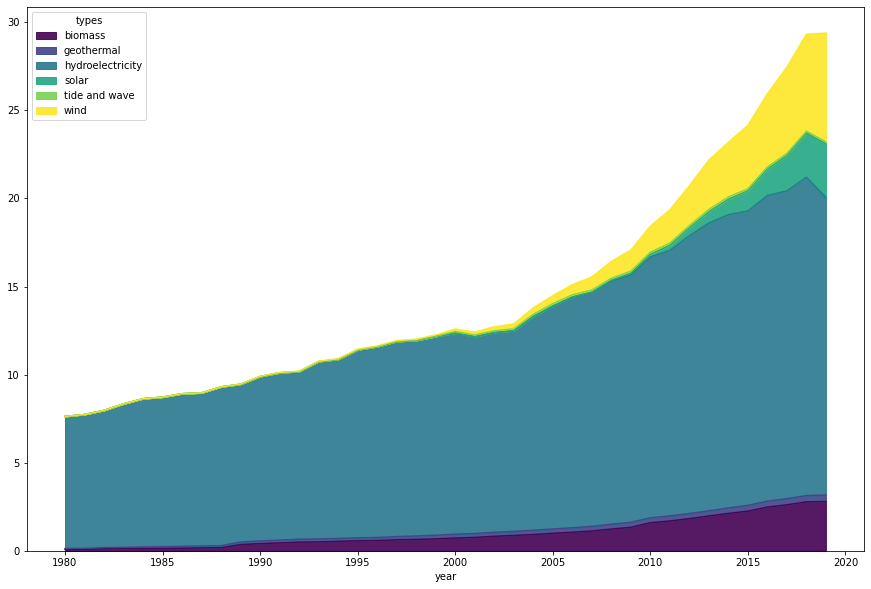

In [8]:
#overview of alternative energy usage for electricity
alt_types = ['            Hydroelectricity (billion kWh)',
       '                Geothermal (billion kWh)',
       '                    Tide and wave (billion kWh)',
       '                    Solar (billion kWh)',
       '                Wind (billion kWh)',
       '                Biomass and waste (billion kWh)',]
alt = data[data.types.isin(alt_types)]
alt_recode = ['hydroelectricity', 'geothermal', 'tide and wave', 'solar', 'wind', 'biomass']
alt_types_new = dict(zip(alt_types, alt_recode))
alt['types'] = alt['types'].replace(alt_types_new)

#visualization of alternative energy as electricity power source
alt_area = alt.pivot_table(index = 'year', columns='types', values = 'value')
alt_area.plot.area(stacked = True, figsize = (15,10), alpha = 0.9, colormap = 'viridis')

In [9]:
#countries leading in renewables usage in 2019
alt_lead = pd.DataFrame(alt['value'].groupby([alt['country'], alt['year']]).sum())
alt_lead.reset_index(inplace=True)
alt_lead = alt_lead[alt_lead['year'] == 2019].sort_values('value', ascending = False).reset_index(drop = True)
alt_lead.head(15)

,country,year,value
0,China,2019,2003.044140
1,United States,2019,775.988251
2,Brazil,2019,511.053000
3,Canada,2019,423.820163
4,India,2019,322.589000
5,Germany,2019,246.543480
6,Japan,2019,225.537656
7,Russia,2019,197.462240
8,Turkey,2019,130.205827
9,Norway,2019,129.654662


In [10]:
#calculation of ratio of alternative energy per fossil fuel energy in 2019
ratio_types = [
       '        Fossil fuels (billion kWh)',
       '        Renewables (billion kWh)']
ratio_recode = ['fossil', 'renewables']
ratio_new = dict(zip(ratio_types, ratio_recode))
data_ratio = data[data.types.isin(ratio_types)]
data_ratio['types'] = data_ratio['types'].replace(ratio_new)
data_ratio = data_ratio.pivot_table(index = ['country','year'], columns='types', values = 'value')
data_ratio.reset_index(inplace=True)

data_ratio['alt per fossil'] = data_ratio['renewables'] / data_ratio['fossil']
data_ratio.replace([np.inf, -np.inf], np.nan, inplace=True)
data_ratio_2019 = data_ratio[(data_ratio['year'] == 2019) & (data_ratio['alt per fossil'] > 0)]
data_ratio_2019['alt per fossil'].dropna(inplace = True)
data_ratio_2019 = data_ratio_2019.sort_values('alt per fossil', ascending = False).reset_index(drop = True)
data_ratio_2019.head(15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


types,country,year,fossil,renewables,alt per fossil
0,Iceland,2019,0.002820,19.261833,6830.437234
1,Costa Rica,2019,0.090240,11.295730,125.174313
2,Switzerland,2019,0.661480,43.219825,65.338068
3,Uruguay,2019,0.271660,15.717920,57.858794
4,Norway,2019,2.361280,129.654662,54.908635
5,Sweden,2019,2.079383,98.555792,47.396652
6,Tajikistan,2019,1.416580,18.977310,13.396568
7,Kyrgyzstan,2019,1.134580,13.705560,12.079853
8,Brazil,2019,89.076280,511.053000,5.737251
9,Denmark,2019,5.014900,24.005537,4.786843


In [11]:
data_ratio_2019[data_ratio_2019['country'] == 'United States']

types,country,year,fossil,renewables,alt per fossil
49,United States,2019,2581.702822,775.988251,0.300572


In [12]:
#electricity generation by power source time series
edata = pd.read_excel('/content/data/MyDrive/python/Python project/Table_7.2a_Electricity_Net_Generation__Total_(All_Sectors).xlsx', skiprows=10)
edata.drop(0, axis = 0, inplace=True)
edata.replace('Not Available', 0, inplace=True)
edata_old = []
for col in edata.columns:
  edata_old.append(col)

edata_new = ['date', 'coal', 'petroleum', 
             'natural gas', 'other gases', 
             'nuclear', 'hydropump', 'hydroelectric', 
             'wood', 'waste', 'geothermal', 'solar', 'wind', 'total']
edata.rename(columns=dict(zip(edata_old, edata_new)), inplace=True)
edata.set_index('date', drop=True, inplace=True)

edata.head()

,coal,petroleum,natural gas,other gases,nuclear,hydropump,hydroelectric,wood,waste,geothermal,solar,wind,total
date,,,,,,,,,,,,,
1973-01-01,75190.149,31183.619,21184.967,0.0,6246.251,0.0,26249.203,5.157,15.152,143.490,0.0,0.0,160217.989
1973-02-01,67797.946,26086.952,20252.525,0.0,5928.069,0.0,23313.025,15.138,13.874,131.171,0.0,0.0,143538.699
1973-03-01,67387.612,24033.245,24043.248,0.0,6649.007,0.0,25874.466,17.940,16.913,135.938,0.0,0.0,148158.370
1973-04-01,63935.049,20195.424,25030.266,0.0,5876.392,0.0,24370.510,6.323,16.771,158.705,0.0,0.0,139589.440
1973-05-01,64927.181,21741.975,29755.984,0.0,5696.657,0.0,25100.563,4.589,20.209,147.965,0.0,0.0,147395.124


In [13]:
#Grouping the dataset by renewables and non-renewables
edata['nonrenewables'] = edata['coal'] + edata['petroleum'] + edata['natural gas'] + edata['other gases'] + edata['nuclear']
edata['renewables'] = edata['hydroelectric'] + edata['waste'] + edata['geothermal'] + edata['solar'] + edata['wind']

df = edata[['nonrenewables','renewables']]
df.head()

,nonrenewables,renewables
date,,
1973-01-01,133804.986,26407.845
1973-02-01,120065.492,23458.070
1973-03-01,122113.112,26027.317
1973-04-01,115037.131,24545.986
1973-05-01,122121.797,25268.737


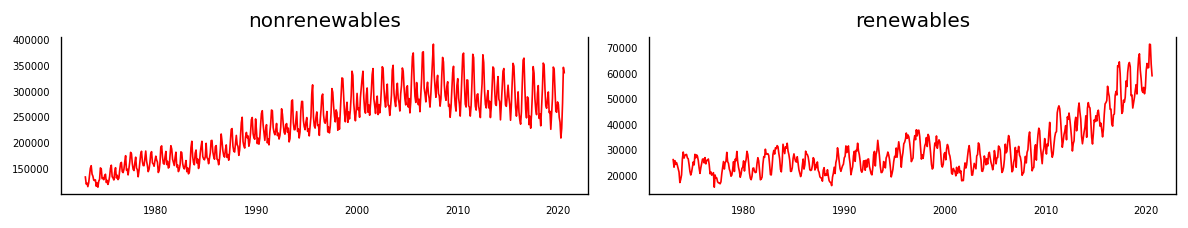

In [14]:
# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(10,2))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [15]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.stats.stattools import durbin_watson

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
#Splitting data into train and test portions
nobs = 48
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape) 
print(df_test.shape)  

(524, 2)
(48, 2)


In [17]:
#Test the stationarity
def adfuller_test(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")   

# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "nonrenewables" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8782
 No. Lags Chosen       = 15
 Critical value 1%     = -3.443
 Critical value 5%     = -2.867
 Critical value 10%    = -2.57
 => P-Value = 0.3424. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "renewables" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.4672
 No. Lags Chosen       = 16
 Critical value 1%     = -3.443
 Critical value 5%     = -2.867
 Critical value 10%    = -2.57
 => P-Value = 0.8983. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [18]:
df_differenced = df_train.diff().dropna()

# ADF Test on each column
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "nonrenewables" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.4038
 No. Lags Chosen       = 14
 Critical value 1%     = -3.443
 Critical value 5%     = -2.867
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "renewables" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.184
 No. Lags Chosen       = 15
 Critical value 1%     = -3.443
 Critical value 5%     = -2.867
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




In [19]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_differenced, variables = df_differenced.columns)

,nonrenewables_x,renewables_x
nonrenewables_y,1.0,0.0
renewables_y,0.0,1.0


In [20]:
def cointegration_test(df, alpha=0.05): 
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_differenced)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
nonrenewables ::  382.7     > 12.3212   =>   True
renewables ::  169.64    > 4.1296    =>   True


In [21]:
model = VAR(df_differenced)
x = model.select_order(maxlags=12)
x.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,36.12,36.13,4.845e+15,36.12
1,35.61,35.66,2.911e+15,35.63
2,35.31,35.39,2.166e+15,35.34
3,35.11,35.22,1.767e+15,35.15
4,34.90,35.05,1.431e+15,34.96
5,34.83,35.01,1.338e+15,34.90
6,34.75,34.96,1.234e+15,34.83
7,34.42,34.67,8.878e+14,34.52
8,34.36,34.64,8.376e+14,34.47
9,34.19,34.50,7.044e+14,34.31


In [22]:
model_fitted = model.fit(12)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 21, Dec, 2020
Time:                     14:29:10
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    33.7115
Nobs:                     511.000    HQIC:                   33.4595
Log likelihood:          -9907.54    FPE:                2.88923e+14
AIC:                      33.2970    Det(Omega_mle):     2.62599e+14
--------------------------------------------------------------------
Results for equation nonrenewables
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                  1745.020000       427.647136            4.081           0.000
L1.nonrenewables         -0.375852         0.042753           -8.791           0.000
L1.renewables            -0.274947  

In [23]:
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

nonrenewables : 2.06
renewables : 2.02


In [25]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 12

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

12


array([[-38755.848,  -2864.096],
       [-40730.218,   2795.048],
       [-17673.245,   5898.57 ],
       [ 19373.289,   4195.295],
       [ 27872.027,    513.228],
       [-39418.216,    777.191],
       [-14956.222,   5600.622],
       [ -8518.062,  -2493.646],
       [ 25020.961,  -1567.155],
       [ 55912.279,  -4950.649],
       [ 43993.109,    110.429],
       [  3702.142,  -5857.46 ]])

In [27]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_1d')

df_results = invert_transformation(df_train, df_forecast, second_diff=False) 

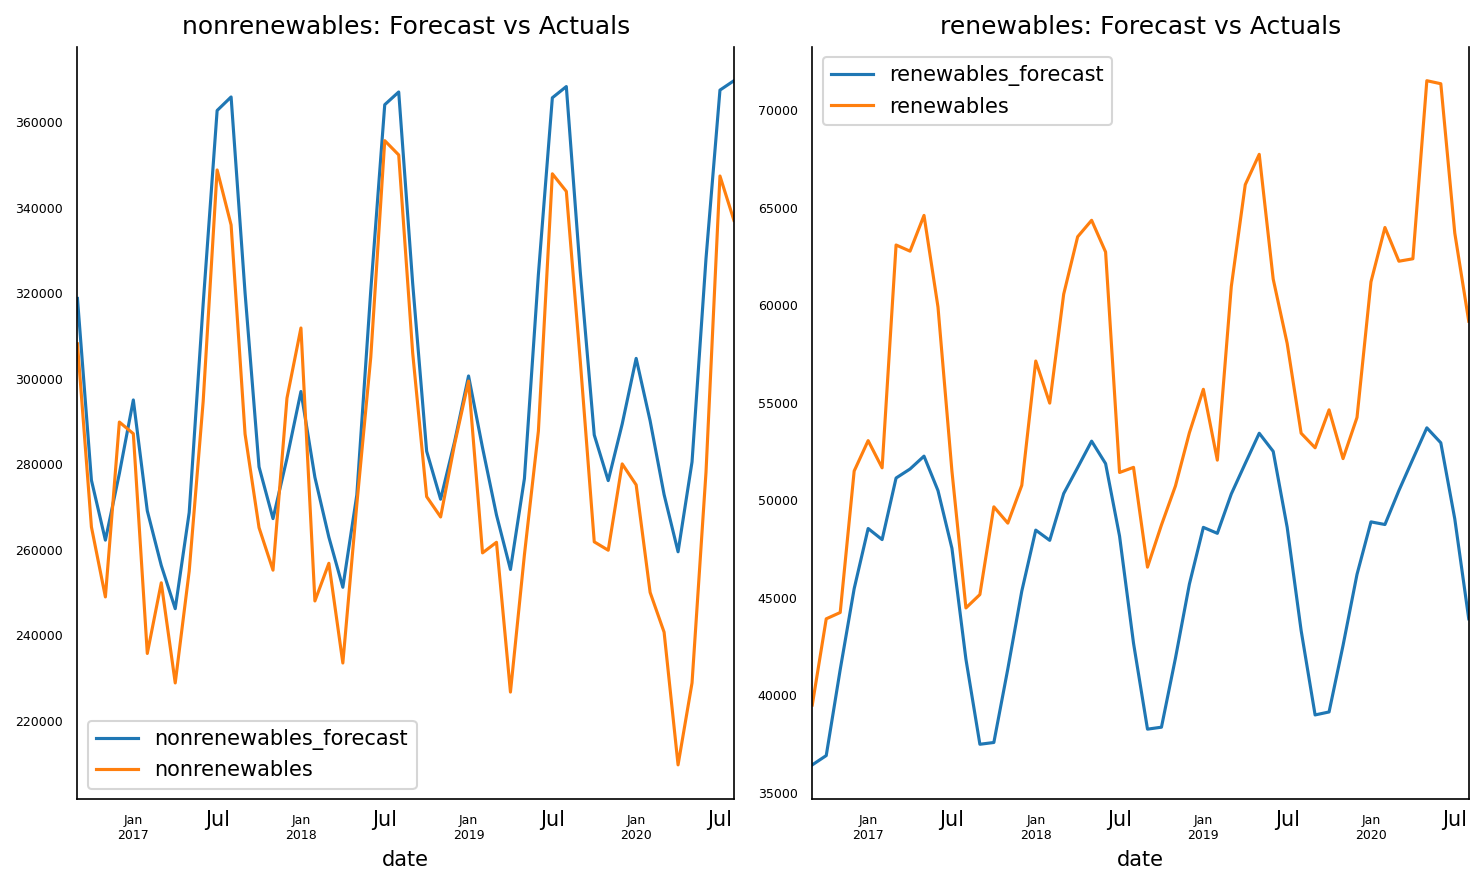

In [28]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,6))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [35]:
#Assessment of predicted values over actuals
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

print(mean_squared_error(df_test['nonrenewables'], df_results['nonrenewables_forecast']))
print(rmse(df_test['nonrenewables'], df_results['nonrenewables_forecast']))

print(mean_squared_error(df_test['renewables'], df_results['renewables_forecast']))
print(rmse(df_test['renewables'], df_results['renewables_forecast']))


539972550.4891773
23237.30945030378
107447935.89275086
10365.709618388451


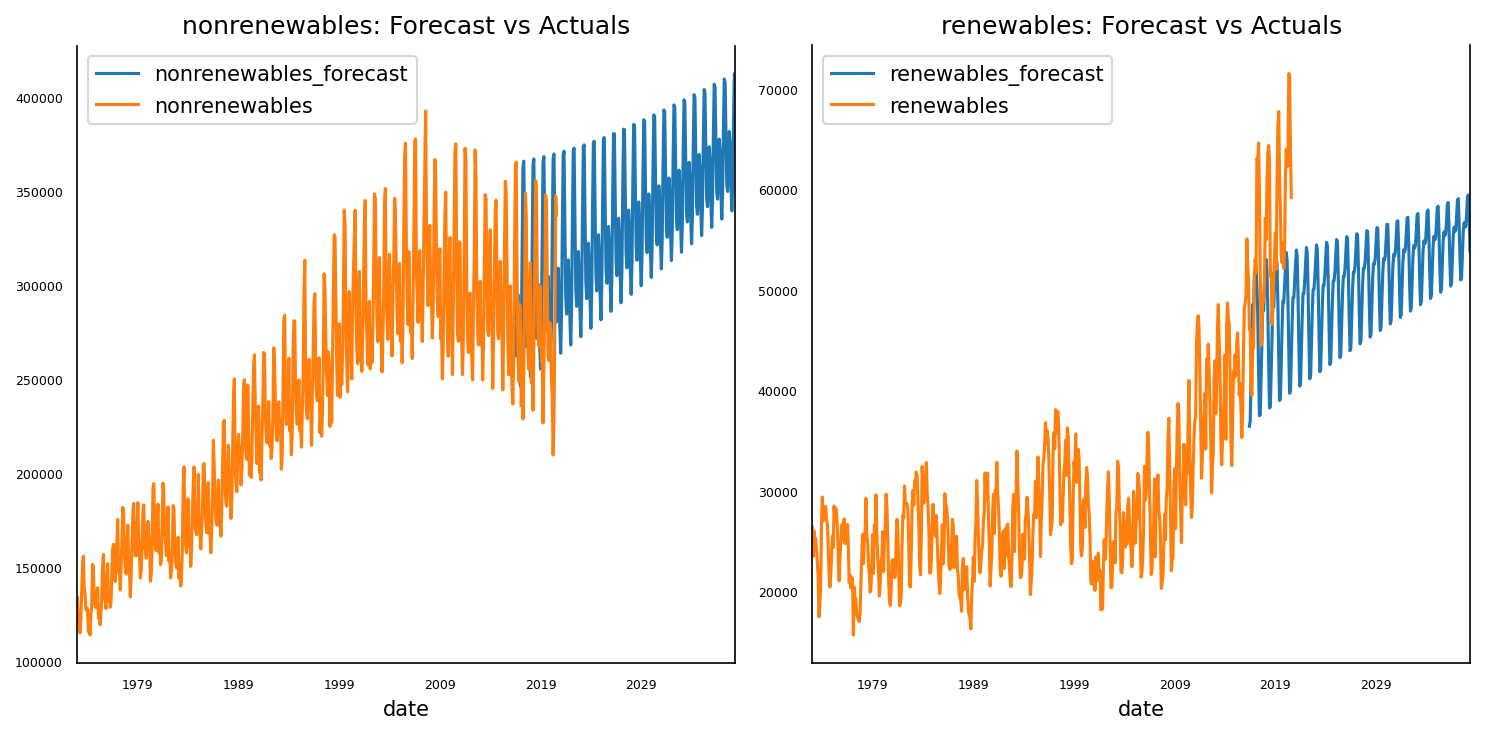

In [36]:
# Forecast extended
fc = model_fitted.forecast(y=forecast_input, steps=264)
df_forecast = pd.DataFrame(fc, columns=df.columns + '_1d')

df_results = invert_transformation(df_train, df_forecast, second_diff=False)        


#adding date column to forecasted values
date_column = pd.date_range('2016-06-01', periods= 264, freq='MS')
df_results['date'] = date_column
df_results.set_index('date', inplace=True)

fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,5))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df[col].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();